**Loss in value**
- compare cars within a car class eg. small car from all makes.

- compare models within 1 make
-new car price were defined as follows
  - lowest mileage
  - max price of car( of that particular car model)

# EDA German Cars

In [1]:
# import pandas, numpy, datetime module
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta

import datetime
import time
import re

# import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import formattings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

RSEED = 3

# Setting plt style
plt.style.use('fast')
sns.set_style("whitegrid",
            {"grid.color": "#EBEBEB",
            "grid.linestyle": ":",
             
            'axes.facecolor': 'white',
            'axes.edgecolor': '#00135D',
             
            'text.color': '#00135D',
            'xtick.color': '#212121',
            'ytick.color': '#212121',
             
            'axes.grid': True,
            'axes.spines.left': True,
            'axes.spines.bottom': True,
            'axes.spines.right': False,
            'axes.spines.top': False,
             
            'xtick.bottom': True,
            'xtick.top': False,
            'ytick.left': True,
            'ytick.right': False})

#sns.set_theme(style="white")


# set color theme
sns_colors = ["#FF6D43", "#00135D", '#FF9C36', '#1D8DB3']
sns.set_palette(sns.color_palette(sns_colors))


primary = '#FF6D43'
secondary = '#00135D'

In [2]:
# Import the dataset and load DF
df = pd.read_csv('../data/df_ml.csv')
df

,make,model,price,fuel,mileage,gear,registration,hp,owner,body,car_condition,consumption,emission,color,displacement,drive_type,class,car_age,car_make_model
0,Volkswagen,Polo GTI,34690.00,Petrol,10.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,4.20,138.00,Gray,1.98,Front,Small car,0.00,Volkswagen Polo GTI
1,Volkswagen,Polo GTI,34950.00,Petrol,1500.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,6.60,138.00,Black,2.00,Rear,Small car,0.00,Volkswagen Polo GTI
2,Volkswagen,Polo GTI,29990.00,Petrol,9000.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,7.40,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
3,Volkswagen,Polo GTI,33989.00,Petrol,3511.00,Automatic,2023.00,152.00,1.00,Sedan,Demonstration vehicle,5.80,138.00,Black,1.98,Front,Small car,0.00,Volkswagen Polo GTI
4,Volkswagen,Polo GTI,37980.00,Petrol,211.00,Automatic,2023.00,152.00,1.00,Small car,Demonstration vehicle,5.70,138.00,White,1.98,Front,Small car,0.00,Volkswagen Polo GTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10963,BMW,X1,35994.00,Electro/Petrol,32082.00,Automatic,2020.00,162.00,1.00,SUV,Used,1.90,43.00,Black,1.50,Four.w.d,Compact SUV,3.00,BMW X1
10964,BMW,X1,38200.00,Electro/Petrol,13000.00,Automatic,2020.00,92.00,1.00,SUV,Used,1.90,43.00,Blue,1.50,Four.w.d,Compact SUV,3.00,BMW X1
10965,Volkswagen,Passat Variant,35185.00,Electro/Petrol,75226.00,Automatic,2019.00,115.00,1.00,Station wagon,Used,1.70,38.00,Silver,1.40,Front,Large family car,4.00,Volkswagen Passat Variant
10966,Audi,A3,24980.00,Electro/Petrol,57509.00,Automatic,2018.00,150.00,1.00,Sedan,Used,1.80,40.00,Red,1.40,Front,Small family car,5.00,Audi A3


In [3]:
# onla last 10 years
df = df[df['registration']>2011]

In [4]:
# change registraion to date time format

df['registration'] = pd.to_datetime(df['registration'].map('{:.0f}'.format), format='%Y').dt.year

# Grouped Sets

# Correlation Matrix

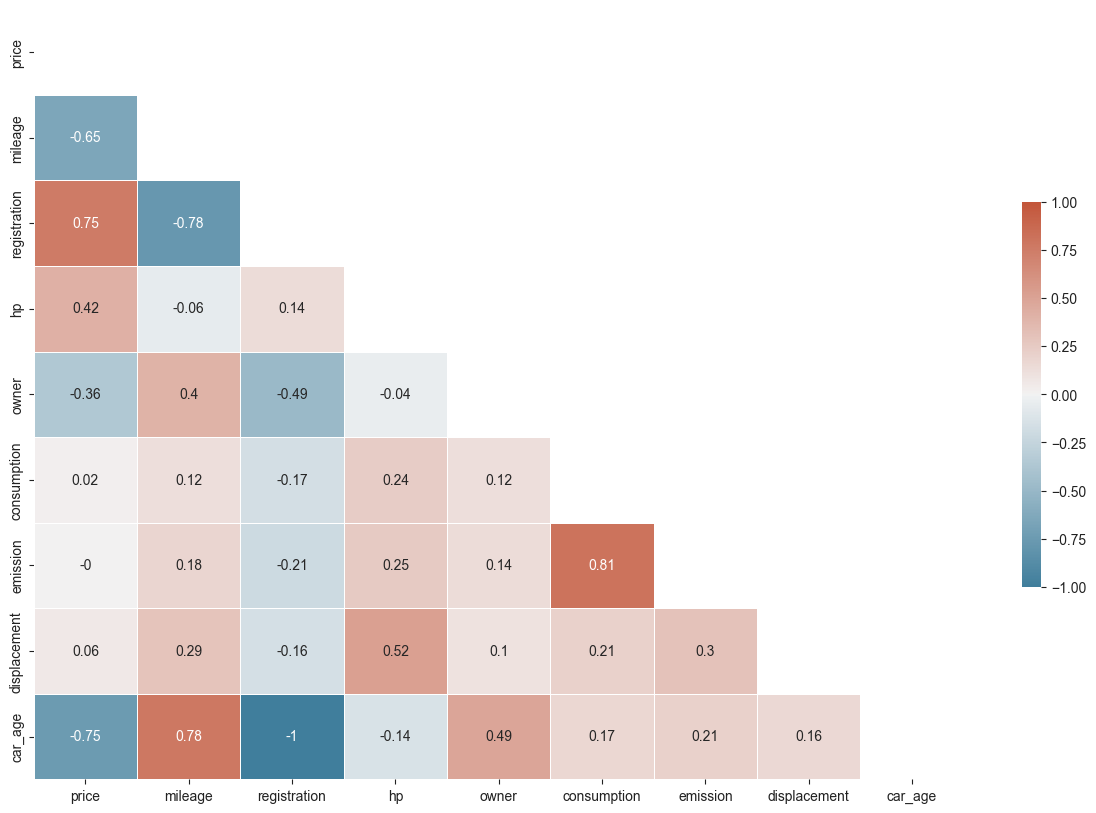

In [5]:
# Compute the correlation matrix
corr = df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5});

# Relational Plot

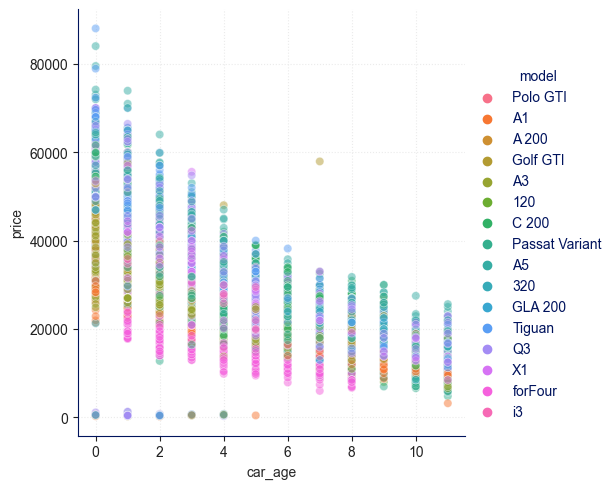

In [6]:
sns.relplot(y=df['price'], x=df['car_age'], hue=df['model'], alpha=0.5);

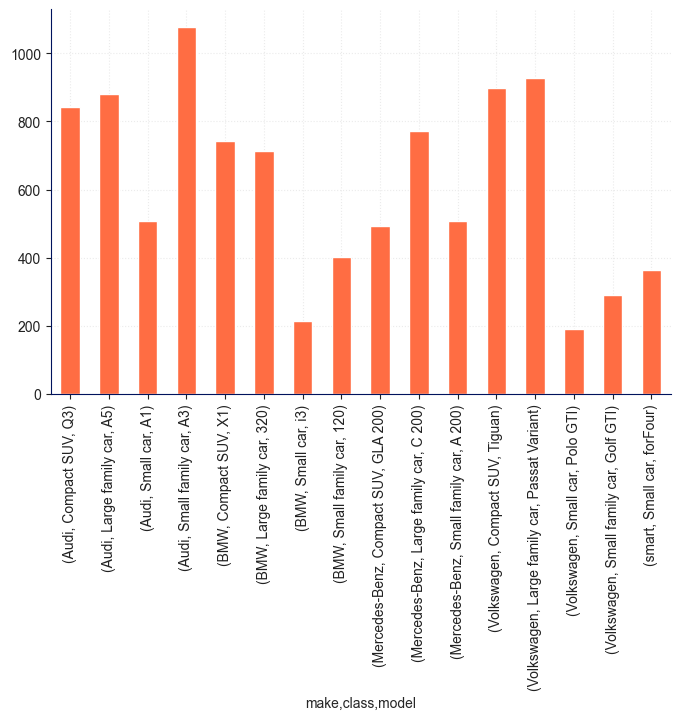

In [7]:
df.groupby(['make', 'class', 'model']).count()['price'].plot(kind='bar');

In [8]:
df.rename(columns={'class': 'car_class', 'car_make_model': 'car'}, inplace=True)

In [9]:
df[['registration','price','car']]

,registration,price,car
0,2023,34690.00,Volkswagen Polo GTI
1,2023,34950.00,Volkswagen Polo GTI
2,2023,29990.00,Volkswagen Polo GTI
3,2023,33989.00,Volkswagen Polo GTI
4,2023,37980.00,Volkswagen Polo GTI
...,...,...,...
10963,2020,35994.00,BMW X1
10964,2020,38200.00,BMW X1
10965,2019,35185.00,Volkswagen Passat Variant
10966,2018,24980.00,Audi A3


In [10]:
df_v = df[df['make'] == 'Volkswagen']

Text(0.5, 1.0, 'Volkswagen average car price/per class')

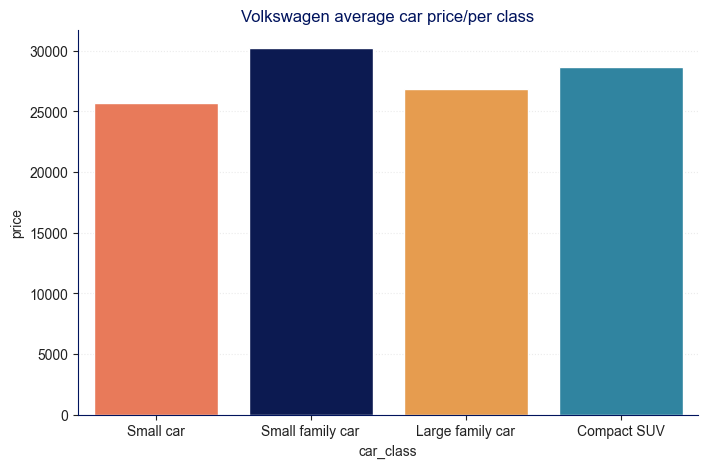

In [11]:
sns.barplot(data =df_v, x='car_class', y='price',ci= None)
plt.title('Volkswagen average car price/per class')

In [12]:
df_grouped = df.groupby(['make', 'car','car_age', 'registration']).mean()['price'].round(2).reset_index()
df_grouped['loss'] = df_grouped['price']


In [13]:
#calculating max price of each car model and assigning it to a data-frame

max_price = df_grouped.groupby(['make','car']).max()['price'].reset_index()
max_price

,make,car,price
0,Audi,Audi A1,30269.49
1,Audi,Audi A3,38096.37
2,Audi,Audi A5,59202.76
3,Audi,Audi Q3,46505.69
4,BMW,BMW 120,44634.50
5,BMW,BMW 320,52084.46
6,BMW,BMW X1,51224.57
7,BMW,BMW i3,35251.03
8,Mercedes-Benz,Mercedes-Benz A 200,43193.73
9,Mercedes-Benz,Mercedes-Benz C 200,53320.70


In [14]:
max_price.rename(columns={"price": "new_price"}, inplace=True)

In [15]:
#merging both the dataframes
df_grouped_1 = pd.merge(df_grouped, max_price,  how='left', left_on=['make', 'car'], right_on = ['make', 'car'])
df_grouped_1

,make,car,car_age,registration,price,loss,new_price
0,Audi,Audi A1,0.00,2023,30269.49,30269.49,30269.49
1,Audi,Audi A1,1.00,2022,26136.86,26136.86,30269.49
2,Audi,Audi A1,2.00,2021,20232.76,20232.76,30269.49
3,Audi,Audi A1,3.00,2020,23842.58,23842.58,30269.49
4,Audi,Audi A1,4.00,2019,22061.18,22061.18,30269.49
...,...,...,...,...,...,...,...
168,smart,smart forFour,4.00,2019,13820.34,13820.34,20543.77
169,smart,smart forFour,5.00,2018,13092.44,13092.44,20543.77
170,smart,smart forFour,6.00,2017,12547.64,12547.64,20543.77
171,smart,smart forFour,7.00,2016,10967.26,10967.26,20543.77


In [16]:
#df_grouped_1['loss'] = df_grouped_1['price_y']-df_grouped_1['price_x']
df_grouped_1

,make,car,car_age,registration,price,loss,new_price
0,Audi,Audi A1,0.00,2023,30269.49,30269.49,30269.49
1,Audi,Audi A1,1.00,2022,26136.86,26136.86,30269.49
2,Audi,Audi A1,2.00,2021,20232.76,20232.76,30269.49
3,Audi,Audi A1,3.00,2020,23842.58,23842.58,30269.49
4,Audi,Audi A1,4.00,2019,22061.18,22061.18,30269.49
...,...,...,...,...,...,...,...
168,smart,smart forFour,4.00,2019,13820.34,13820.34,20543.77
169,smart,smart forFour,5.00,2018,13092.44,13092.44,20543.77
170,smart,smart forFour,6.00,2017,12547.64,12547.64,20543.77
171,smart,smart forFour,7.00,2016,10967.26,10967.26,20543.77


In [17]:
df_grouped_1['loss%'] = (df_grouped_1[['price','new_price']].pct_change(axis=1)['new_price']*100).round(2)

#df_grouped_1.eval('loss = new_price - price', inplace = True)
df_grouped_1.head()

,make,car,car_age,registration,price,loss,new_price,loss%
0,Audi,Audi A1,0.00,2023,30269.49,30269.49,30269.49,0.00
1,Audi,Audi A1,1.00,2022,26136.86,26136.86,30269.49,15.81
2,Audi,Audi A1,2.00,2021,20232.76,20232.76,30269.49,49.61
3,Audi,Audi A1,3.00,2020,23842.58,23842.58,30269.49,26.96
4,Audi,Audi A1,4.00,2019,22061.18,22061.18,30269.49,37.21


Text(0.5, 1.0, ' Average price loss in cars in last 10 years')

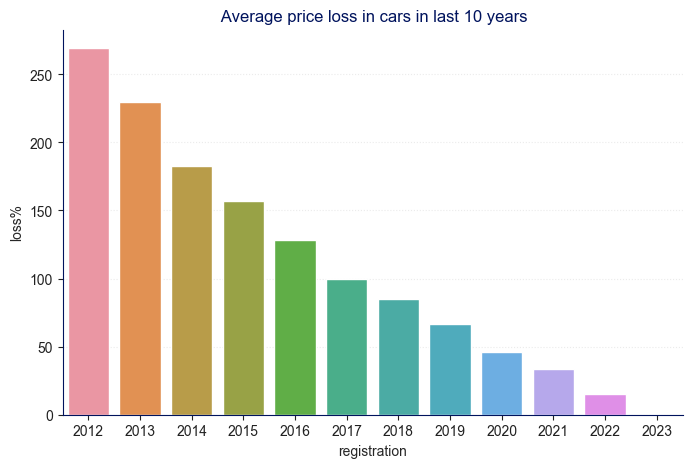

In [18]:
sns.barplot(data=df_grouped_1,x='registration',y='loss%',ci=None)
plt.title(' Average price loss in cars in last 10 years')


In [24]:
    def split_all_cars(df, car):
    return df_grouped[df_grouped['car'] == car].sort_values(['registration'], ascending = False)


In [26]:
cars_name = ['Audi Q3', 'BMW X1', 'Mercedes-Benz GLA 200', 'Volkswagen Tiguan',
       'Audi A5', 'BMW 320', 'Mercedes-Benz C 200',
       'Volkswagen Passat Variant', 'Audi A1', 'BMW i3',
       'Volkswagen Polo GTI', 'smart forFour', 'Audi A3', 'BMW 120',
       'Mercedes-Benz A 200', 'Volkswagen Golf GTI']
dfs = {car: split_all_cars(df, car) for car in cars_name}


In [27]:
for key, data in dfs.items():
   
    data['loss'] =((1- data['loss']/data['price'].max())*100).round(2)

In [29]:
df_loss = pd.concat(dfs.values(), ignore_index=True)
df_loss.head()

,make,car,car_age,registration,price,loss
0,Audi,Audi Q3,0.00,2023,46505.69,0.00
1,Audi,Audi Q3,1.00,2022,38732.30,16.71
2,Audi,Audi Q3,2.00,2021,40202.74,13.55
3,Audi,Audi Q3,3.00,2020,37057.65,20.32
4,Audi,Audi Q3,4.00,2019,32262.08,30.63


In [28]:
dfs['Volkswagen Tiguan']

,make,car,car_age,registration,price,loss
153,Volkswagen,Volkswagen Tiguan,0.00,2023,52510.27,0.00
154,Volkswagen,Volkswagen Tiguan,1.00,2022,44752.26,14.77
155,Volkswagen,Volkswagen Tiguan,2.00,2021,38302.96,27.06
156,Volkswagen,Volkswagen Tiguan,3.00,2020,31946.97,39.16
157,Volkswagen,Volkswagen Tiguan,4.00,2019,28763.24,45.22
158,Volkswagen,Volkswagen Tiguan,5.00,2018,26782.70,49.00
159,Volkswagen,Volkswagen Tiguan,6.00,2017,24873.19,52.63
160,Volkswagen,Volkswagen Tiguan,7.00,2016,20694.60,60.59
161,Volkswagen,Volkswagen Tiguan,8.00,2015,16894.08,67.83
162,Volkswagen,Volkswagen Tiguan,9.00,2014,15762.17,69.98


In [30]:
df_volkswagen = df_loss.query('make =="Volkswagen"')

In [31]:
df_Audi = df_loss.query('make =="Audi"')

In [32]:
df_BMW = df_loss.query('make =="BMW"')

In [33]:
df_Mercedez = df_loss.query('make == "Mercedes-Benz" | make == "smart"')


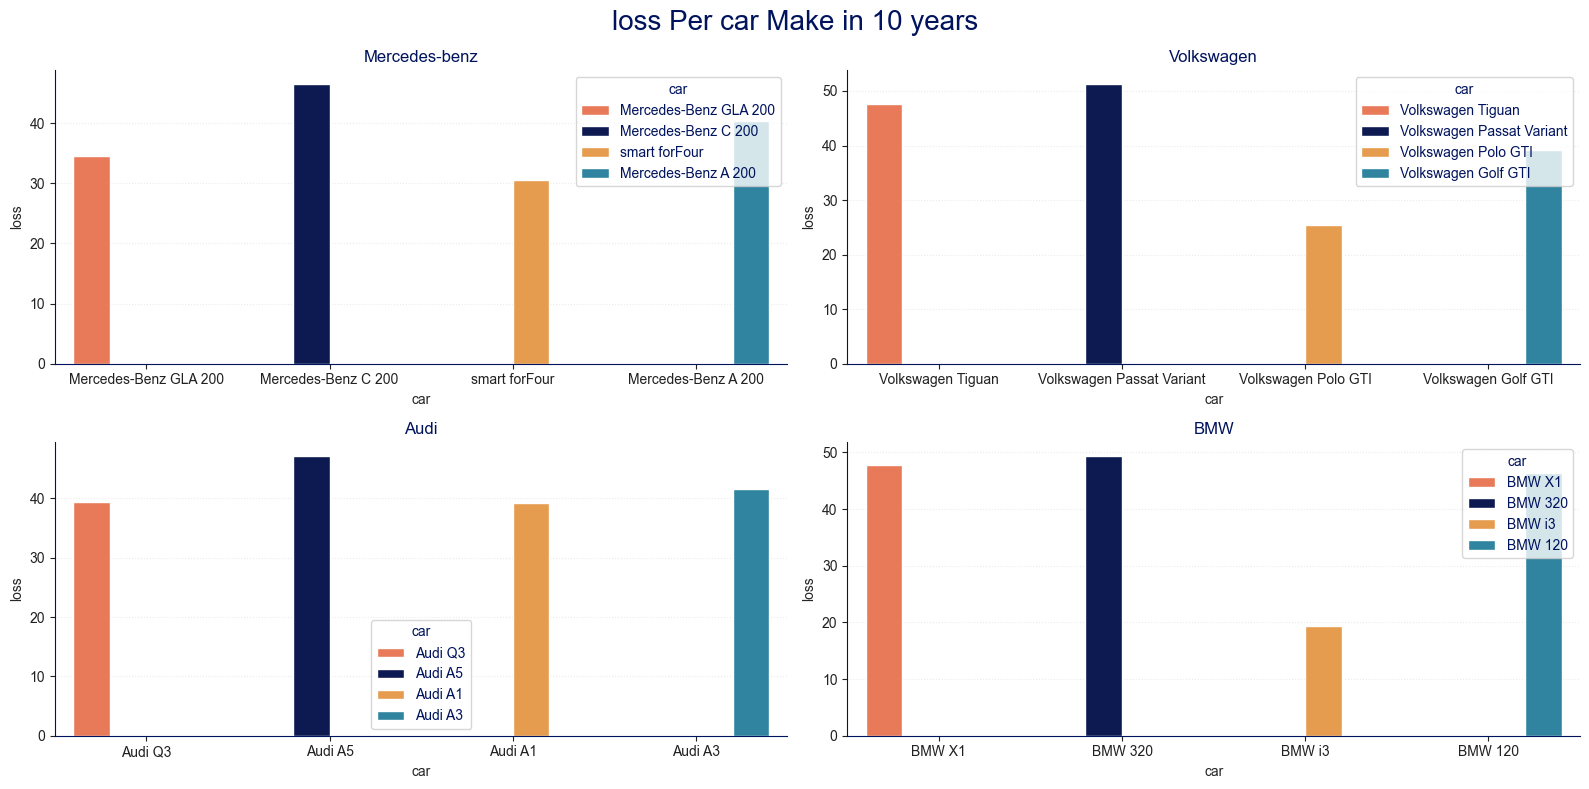

In [34]:
plt.figure(figsize=(16,8))
plt.suptitle('loss Per car Make in 10 years', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.barplot(data = df_Mercedez, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Mercedes-benz')

plt.subplot(2, 2, 2)  
sns.barplot(data = df_volkswagen, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Volkswagen')

plt.subplot(2, 2, 3) 
sns.barplot(data = df_Audi, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('Audi')

plt.subplot(2, 2, 4)
sns.barplot(data = df_BMW, x = 'car', y= 'loss', hue= 'car',ci=None);
plt.title('BMW');
plt.subplots_adjust(top=0.85)
plt.tight_layout();

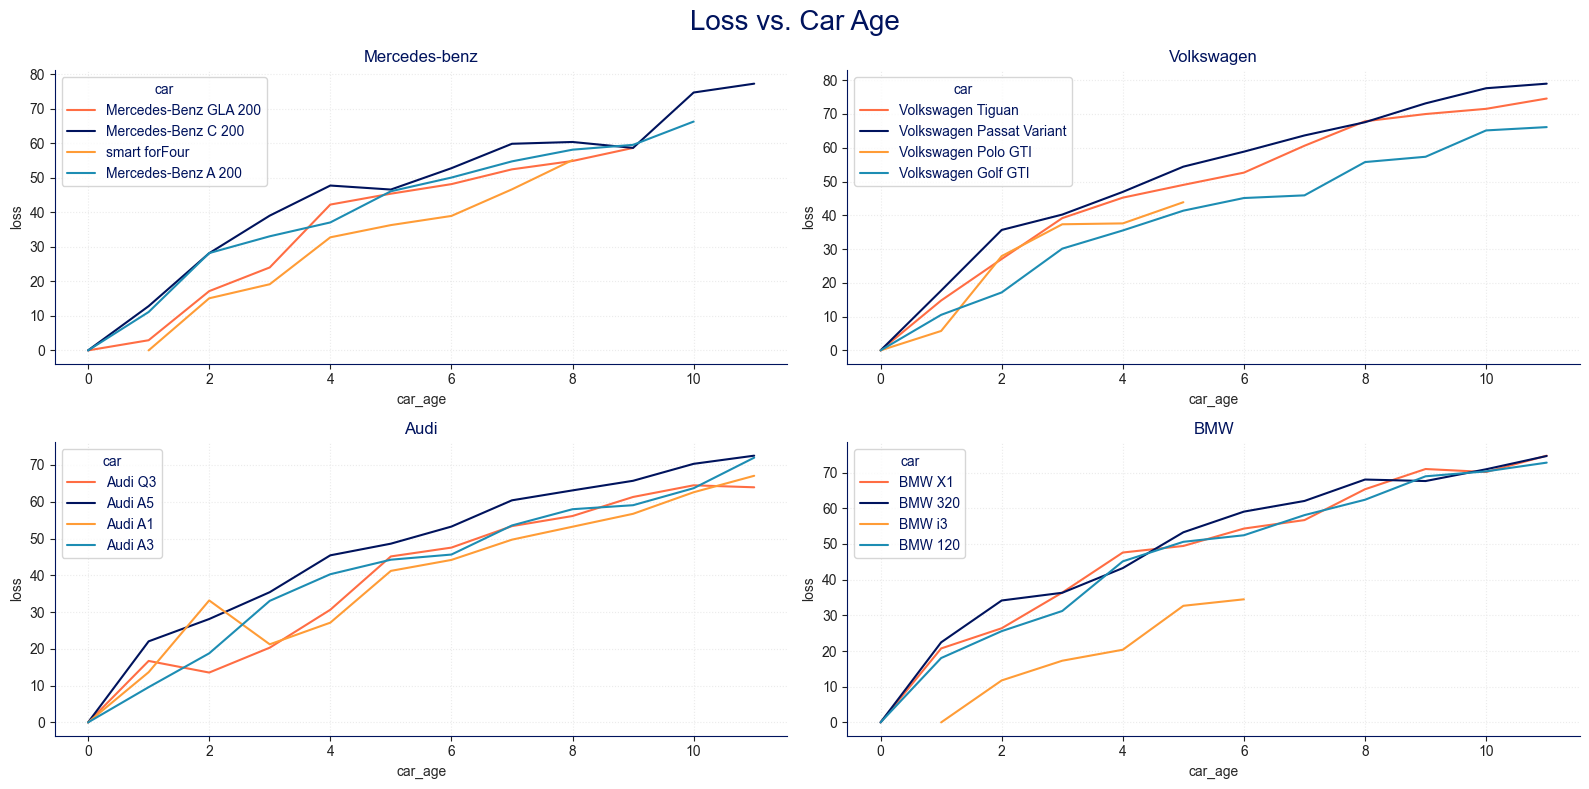

In [35]:
plt.figure(figsize=(16,8))
plt.suptitle('Loss vs. Car Age', fontsize=20) # add a super title to the container

plt.subplot(2, 2, 1)  
sns.lineplot(data = df_Mercedez, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Mercedes-benz')

plt.subplot(2, 2, 2)  
sns.lineplot(data = df_volkswagen, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Volkswagen')

plt.subplot(2, 2, 3) 
sns.lineplot(data = df_Audi, x = 'car_age', y= 'loss', hue= 'car');
plt.title('Audi')

plt.subplot(2, 2, 4)
sns.lineplot(data = df_BMW, x = 'car_age', y= 'loss', hue= 'car');
plt.title('BMW');
plt.subplots_adjust(top=0.85)
plt.tight_layout();